# Stock vs Index hurst index estimation - Log S-fbm model

### Done by : Othmane ZARHALI

# Importations

In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes"))

import matplotlib.pyplot as plt
from math import log
import warnings
warnings.filterwarnings("ignore")

from DataAcquisition import *
from GMMCalibration import *
from LogSfbmModel import *

# Oxford Man institute realized volatility acquisition

In [2]:
File_path = "/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes/oxfordmanrealizedvolatilityindices.csv"
realized_vol_data_obj_ox = DataAcquisition('OxfordManInstitute',File_path)

In [3]:
realized_vol_data_obj_ox.IndicesCharging()
indices_list = realized_vol_data_obj_ox.indices_list
vol_dataset = realized_vol_data_obj_ox.dataframe_indices
print(vol_dataset)

         index                 Unnamed: 0 Symbol  close_time  rk_parzen  \
0            0  2000-01-03 00:00:00+00:00   .AEX    163015.0   0.000179   
1            1  2000-01-04 00:00:00+00:00   .AEX    163016.0   0.000423   
2            2  2000-01-05 00:00:00+00:00   .AEX    163016.0   0.000324   
3            3  2000-01-06 00:00:00+00:00   .AEX    163002.0   0.000219   
4            4  2000-01-07 00:00:00+00:00   .AEX    163016.0   0.000155   
...        ...                        ...    ...         ...        ...   
139940  145271  2021-04-05 00:00:00+01:00   .STI    180000.0   0.000004   
139941  145272  2021-04-06 00:00:00+01:00   .STI    180000.0   0.000024   
139942  145273  2021-04-07 00:00:00+01:00   .STI    180000.0   0.000013   
139943  145274  2021-04-08 00:00:00+01:00   .STI    175959.0   0.000009   
139944  145275  2021-04-09 00:00:00+01:00   .STI    180000.0   0.000006   

        open_time  open_price     medrv       rv5        bv  ...    rk_th2  \
0         90101.0    

Indices available

In [4]:
indices_list

['.AEX',
 '.AORD',
 '.BFX',
 '.BSESN',
 '.BVLG',
 '.BVSP',
 '.DJI',
 '.FCHI',
 '.FTMIB',
 '.FTSE',
 '.GDAXI',
 '.GSPTSE',
 '.HSI',
 '.IBEX',
 '.IXIC',
 '.KS11',
 '.KSE',
 '.MXX',
 '.N225',
 '.NSEI',
 '.OMXC20',
 '.OMXHPI',
 '.OMXSPI',
 '.OSEAX',
 '.RUT',
 '.SMSI',
 '.SSEC',
 '.SSMI',
 '.STI']

##### Log vol computation

##### Let's consider two indices : NSEI and STI

In [5]:
log_vols_NSEI = realized_vol_data_obj_ox.GetlogVol(".NSEI",'bv',True,True,False,0,0)
log_vols_STI = realized_vol_data_obj_ox.GetlogVol(".STI",'bv',True,True,False,0,0)
print(log_vols_NSEI,log_vols_STI)

[ -9.09583846  -8.42565538  -8.41514315 ...  -9.20799311 -10.37571292
 -11.10107484] [-10.85806965 -10.23129018  -9.93152778 ...  -9.97600644  -9.8917955
  -9.86773188]


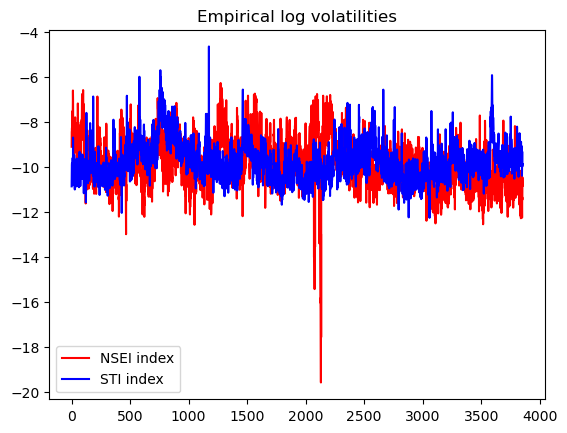

In [6]:
min_length = min(len(log_vols_NSEI),len(log_vols_STI))
time_line = np.arange(min_length)
plt.plot(time_line,log_vols_NSEI[:min_length], color='red',label='NSEI index')
plt.plot(time_line,log_vols_STI[:min_length], color='blue',label='STI index')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

##### Log vol statistics

##### Numerical tests -  NSEI

In [7]:
# NSEI
logvolvariance_overall_with_lag_NSEI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_NSEI)
print(logvolvariance_overall_with_lag_NSEI)

(array([   8,    9,   12,   14,   18,   22,   28,   34,   42,   52,   64,
         79,   98,  120,  148,  183,  226,  278,  343,  422,  521,  642,
        791,  975, 1201, 1480, 1824, 2248, 2770, 3413, 4206, 5183]), array([0.35842535, 0.37524941, 0.41599062, 0.4381994 , 0.47550027,
       0.50773756, 0.54964531, 0.58411015, 0.62014323, 0.65322222,
       0.6802255 , 0.7074864 , 0.73739737, 0.76633661, 0.79322425,
       0.81666472, 0.83875362, 0.86066882, 0.87920371, 0.89422324,
       0.9089994 , 0.92457659, 0.93926288, 0.95923213, 0.98452674,
       1.01168093, 1.04670444, 1.09140392, 1.13095154, 1.16028133,
       1.13001706,        nan]))


In [8]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek('.NSEI')
print(means_and_variance_eachday_in_week)

(array([-9.05457534, -8.70085103, -9.18843551, -9.21880093, -9.81530079]), array([0.78077038, 1.53100143, 0.56212798, 0.51751696, 0.01510113]))


In [9]:
correl = Correlation(log_vols_NSEI,log_vols_NSEI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([1.08385978, 0.78083193, 0.701292  , 0.65365305, 0.61472904,
       0.61077713, 0.55307408, 0.52553815, 0.49779351, 0.49031727,
       0.49593499, 0.45630645, 0.43516446, 0.43246381, 0.41850497,
       0.409631  , 0.37083193, 0.34827862, 0.34972304, 0.33220779,
       0.31701237, 0.28914225, 0.28188284, 0.28132966, 0.28327881,
       0.27685011, 0.26077149, 0.25676326, 0.25973784, 0.2636926 ,
       0.25447167, 0.24994179, 0.2480732 , 0.25472634, 0.25905081,
       0.25614122, 0.24835241, 0.25703416, 0.24836318, 0.25128471,
       0.24110904, 0.23756706, 0.24073382, 0.25230844, 0.26547803,
       0.26772659, 0.26084441, 0.26888187, 0.28068201, 0.26864436,
       0.28446571]))


##### Numerical tests -  STI

In [10]:
# STI
logvolvariance_overall_with_lag_STI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_STI)
print(logvolvariance_overall_with_lag_STI)

(array([   8,    9,   11,   14,   17,   21,   26,   32,   39,   48,   58,
         71,   87,  106,  130,  158,  193,  236,  288,  352,  430,  525,
        641,  782,  955, 1165, 1422, 1736, 2119, 2587, 3157, 3854]), array([0.18273815, 0.18972343, 0.20144343, 0.21593706, 0.22769403,
       0.24095312, 0.25510806, 0.26978724, 0.28439693, 0.30015858,
       0.31527965, 0.33189439, 0.34916642, 0.36677116, 0.38499093,
       0.40253773, 0.42001739, 0.43867449, 0.45920557, 0.48098552,
       0.5068847 , 0.53854361, 0.57256764, 0.60256036, 0.60940972,
       0.61395769, 0.62028397, 0.62769465, 0.63290987, 0.6567422 ,
       0.69929094,        nan]))


In [11]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek(".STI")
print(means_and_variance_eachday_in_week)

(array([-10.85806965, -10.23129018,  -9.93152778,  -9.82895074,
       -10.09268284]), array([1.15224036, 0.19949187, 0.02157454, 0.00196299, 0.09488728]))


In [12]:
correl = Correlation(log_vols_STI,log_vols_STI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([0.65945294, 0.49742405, 0.45827235, 0.44268707, 0.42729325,
       0.42060089, 0.40239439, 0.39835343, 0.39364837, 0.38300065,
       0.38237012, 0.36583987, 0.35021808, 0.35613399, 0.35539619,
       0.34918668, 0.3409036 , 0.33442755, 0.32939468, 0.32731938,
       0.32173866, 0.31295264, 0.31003246, 0.30617113, 0.30392936,
       0.30272755, 0.29056251, 0.2869957 , 0.28180388, 0.27833755,
       0.27958174, 0.27724508, 0.27578545, 0.26964285, 0.27446028,
       0.28156098, 0.2679243 , 0.26988708, 0.26415253, 0.26117487,
       0.26394733, 0.2579122 , 0.25592286, 0.24922336, 0.24350831,
       0.25146695, 0.24683316, 0.23884517, 0.23807632, 0.2312326 ,
       0.23689783]))


# Yahoo finance data acquisition

##### Log vol computation

##### Let's consider two stocks : GOOGL and AMZN

##### GOOGL

In [13]:
realized_vol_data_obj_yf_GOOGL = DataAcquisition('Yahoo finance')

In [14]:
realized_vol_data_obj_yf_GOOGL.IndicesCharging("GOOGL",first_date="1900-01-01",last_date="2034-01-01")
market_data_GOOGL = realized_vol_data_obj_yf_GOOGL.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [15]:
market_data_GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2022-11-02,90.940002,91.180000,86.879997,86.970001,86.970001,57038300
2022-11-03,86.320000,86.519997,83.339996,83.430000,83.430000,61288000
2022-11-04,85.400002,86.639999,83.709999,86.580002,86.580002,51105600


In [16]:
market_capitalization_GOOGL = realized_vol_data_obj_yf_GOOGL.market_capitalization

In [17]:
signal_test_GOOGL = market_data_GOOGL["Close"]

In [18]:
removed0signal_test_GOOGL = realized_vol_data_obj_yf_GOOGL.removeZeros(np.array(signal_test_GOOGL))
log_vol_estimator_GOOGL = realized_vol_data_obj_yf_GOOGL.ComputeLogVolEstimator()

##### AMZN

In [19]:
realized_vol_data_obj_yf_AMZN = DataAcquisition('Yahoo finance')

In [20]:
realized_vol_data_obj_yf_AMZN.IndicesCharging("AMZN",first_date="1900-01-01",last_date="2034-01-01")
market_data_AMZN = realized_vol_data_obj_yf_AMZN.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [21]:
market_data_AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,128999900


In [22]:
market_capitalization_AMZN = realized_vol_data_obj_yf_AMZN.market_capitalization

In [23]:
signal_test_AMZN = market_data_AMZN["Close"]

In [24]:
removed0signal_test_AMZN = realized_vol_data_obj_yf_AMZN.removeZeros(np.array(signal_test_AMZN))
log_vol_estimator_AMZN = realized_vol_data_obj_yf_AMZN.ComputeLogVolEstimator()

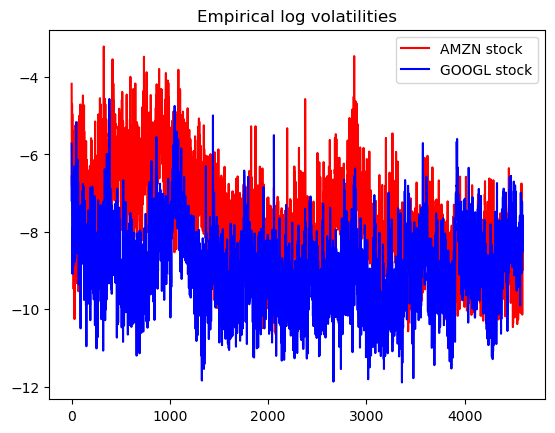

In [25]:
min_length = min(len(log_vol_estimator_AMZN),len(log_vol_estimator_GOOGL))
time_line = np.arange(min_length)
plt.plot(time_line,log_vol_estimator_AMZN[:min_length], color='red',label='AMZN stock')
plt.plot(time_line,log_vol_estimator_GOOGL[:min_length], color='blue',label='GOOGL stock')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

# GMM Calibration

In [26]:
GMM_obj = GMM()

### GMM on indices

##### NSEI

*******************************
res =        fun: 0.014382097864422329
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.56943514e-05, -5.20417046e-10,  8.67361738e-10])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4556
      nit: 416
     njev: 1139
   status: 0
  success: True
        x: array([-5.1770887 , -1.84065629,  0.06167522])
*******************************
Objective function value after calibration =  0.005105415981393452


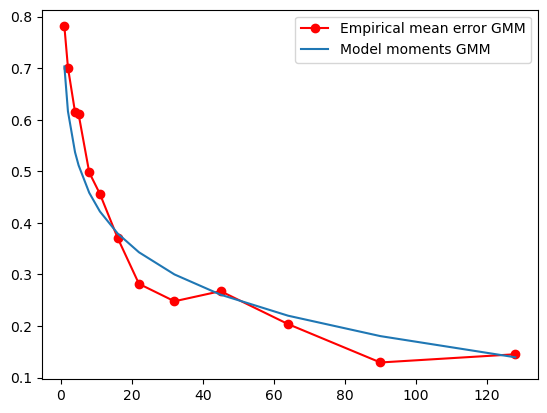

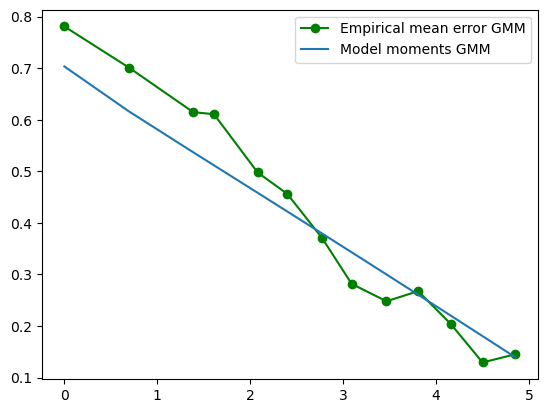

H =  0.005582377919682376 lambda2 = 0.10935691633908327 T =  1.0697488753025635 lsigma2 = 4.5399929762484854e-05 p-Value=  0.003166796958927884 J =  26.46137103156232 J_95 =  18.30703805327515
------------------------------------------------------


(0.005582377919682376,
 0.10935691633908327,
 1.0697488753025635,
 4.5399929762484854e-05,
 0.003166796958927884,
 26.46137103156232,
 18.30703805327515,
 [array([0.78083193, 0.701292  , 0.61472904, 0.61077713, 0.49779351,
         0.45630645, 0.37083193, 0.28188284, 0.2480732 , 0.26772659,
         0.203828  , 0.12942438, 0.14536152]),
  array([0.70328145, 0.61635971, 0.53697281, 0.51166717, 0.45837923,
         0.42220084, 0.37950863, 0.34310116, 0.30010809, 0.26083772,
         0.22011149, 0.18053947, 0.13949864]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [27]:
calibrated_parameters_NSEI = GMM_obj.ComputeParamsGMM(log_vols_NSEI)
calibrated_parameters_NSEI

##### STI

*******************************
res =        fun: 0.000385662821968008
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.49464860e-06, -3.66276022e-07, -6.38367401e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 464
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([-2.28268463, -3.30107914,  1.13269762])
*******************************
Objective function value after calibration =  0.0011198642548073128


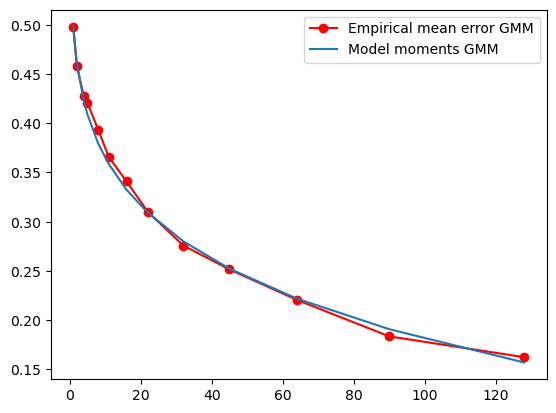

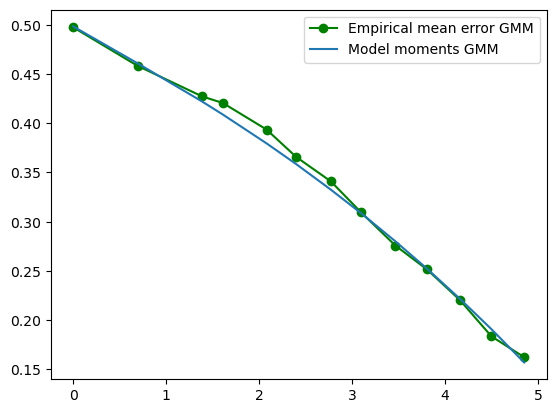

H =  0.076972167347693 lambda2 = 0.03952835398816385 T =  2.6278243571722353 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9319700526550283 J =  4.315956838027383 J_95 =  18.30703805327515
------------------------------------------------------


(0.076972167347693,
 0.03952835398816385,
 2.6278243571722353,
 4.5399929762484854e-05,
 0.9319700526550283,
 4.315956838027383,
 18.30703805327515,
 [array([0.49742405, 0.45827235, 0.42729325, 0.42060089, 0.39364837,
         0.36583987, 0.3409036 , 0.31003246, 0.27578545, 0.25146695,
         0.22053445, 0.18351524, 0.16235613]),
  array([0.49831654, 0.46081518, 0.42208908, 0.40887157, 0.37959705,
         0.35856292, 0.33247639, 0.3091001 , 0.2800925 , 0.25220777,
         0.22182169, 0.19079908, 0.15699248]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [28]:
calibrated_parameters_STI = GMM_obj.ComputeParamsGMM(log_vols_STI)
calibrated_parameters_STI

### GMM on stocks

##### GOOGL

*******************************
res =        fun: 0.0006570845093599535
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.44455846e-06, -8.21066310e-08, -2.44075595e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 448
      nit: 37
     njev: 112
   status: 2
  success: False
        x: array([-2.19662495, -3.00913488,  1.14470462])
*******************************
Objective function value after calibration =  0.0012664878665839664


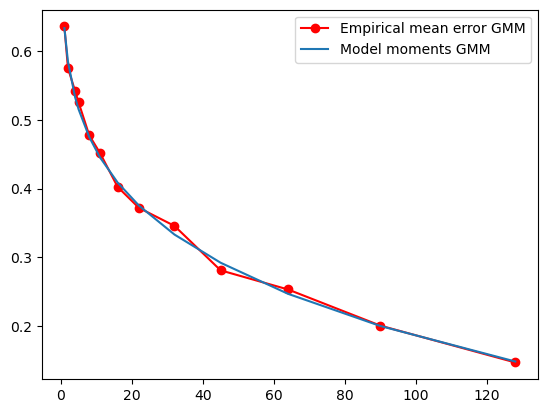

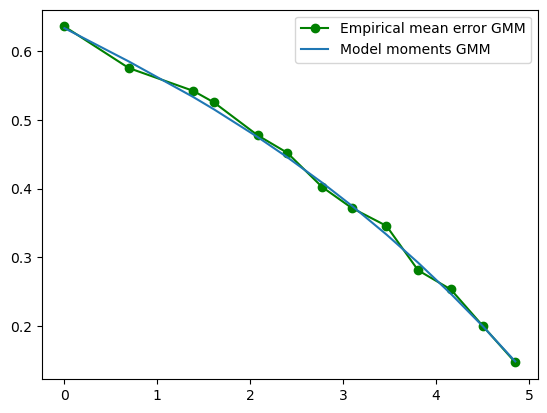

H =  0.09540968183051254 lambda2 = 0.048596935522216334 T =  2.996218133655504 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8308101334707606 J =  5.811912819753822 J_95 =  18.30703805327515
------------------------------------------------------


(0.09540968183051254,
 0.048596935522216334,
 2.996218133655504,
 4.5399929762484854e-05,
 0.8308101334707606,
 5.811912819753822,
 18.30703805327515,
 [array([0.63586222, 0.57541457, 0.54222125, 0.52538599, 0.47758875,
         0.45218101, 0.40248832, 0.37201321, 0.34583264, 0.28119934,
         0.25335435, 0.20077579, 0.14720013]),
  array([0.6334882 , 0.58497605, 0.5332997 , 0.51535154, 0.47507631,
         0.44571256, 0.40882474, 0.37534408, 0.33326223, 0.29227236,
         0.24703074, 0.20024743, 0.14860979]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [29]:
calibrated_parameters_GOOGL = GMM_obj.ComputeParamsGMM(log_vol_estimator_GOOGL)
calibrated_parameters_GOOGL

##### AMZN

*******************************
res =        fun: 0.0007177303983763245
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.94221333e-06, 7.46906881e-08, 2.86381160e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 936
      nit: 147
     njev: 234
   status: 0
  success: True
        x: array([-3.11192709, -2.710575  ,  0.98623026])
*******************************
Objective function value after calibration =  0.0007433060531998198


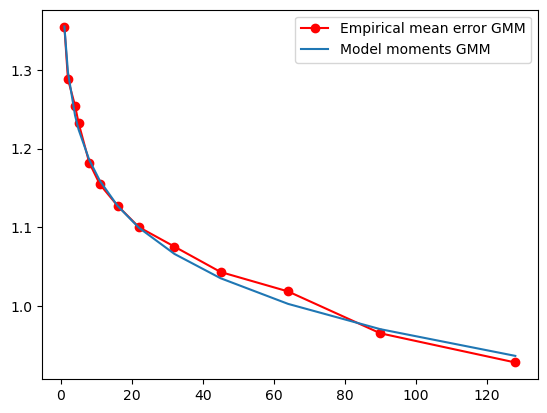

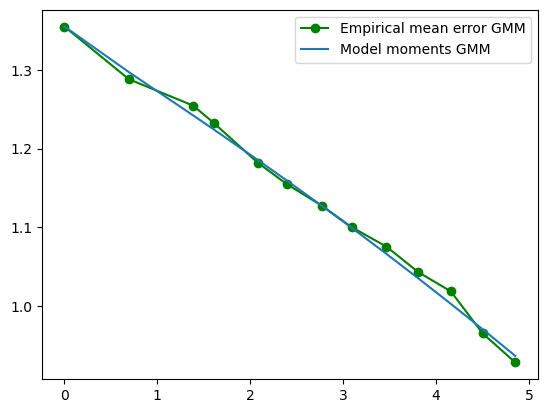

H =  0.029279936953710957 lambda2 = 0.06898197479228908 T =  2.0769555727800633 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9061080950471897 J =  4.7683083312768435 J_95 =  18.30703805327515
------------------------------------------------------


(0.029279936953710957,
 0.06898197479228908,
 2.0769555727800633,
 4.5399929762484854e-05,
 0.9061080950471897,
 4.7683083312768435,
 18.30703805327515,
 [array([1.35512682, 1.28821923, 1.2545646 , 1.23238766, 1.18212638,
         1.15437929, 1.12717072, 1.10003365, 1.07527391, 1.04300478,
         1.01831907, 0.96505564, 0.92797675]),
  array([1.35523446, 1.29727779, 1.24211634, 1.22412712, 1.18560653,
         1.15895658, 1.12698522, 1.09926802, 1.06599436, 1.03508184,
         1.0024922 , 0.97030171, 0.93636339]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [30]:
calibrated_parameters_AMZN = GMM_obj.ComputeParamsGMM(log_vol_estimator_AMZN)
calibrated_parameters_AMZN

### Multiple Stock and indices calibration

### Indices

In [31]:
Indices_test_symbols = ['.AEX','.AORD','.BFX', '.BSESN']

In [32]:
logvol_synthesis_ox = realized_vol_data_obj_ox.LogVolSynthesisOverAssets(Indices_test_symbols)
logvol_synthesis_ox

{'.AEX': array([ -9.363648  ,  -9.2829408 ,  -9.50419861, ..., -10.49494979,
        -10.66919384, -10.78024093]),
 '.AORD': array([ -9.810457  , -10.30105542,  -9.36433307, ...,  -9.88412876,
        -10.28379873, -11.13394767]),
 '.BFX': array([ -9.71483899, -10.46947439, -10.05192215, ..., -10.47888137,
        -10.44993989, -11.10387582]),
 '.BSESN': array([ -8.93322485,  -8.79850441,  -8.76741764, ..., -10.37471496,
        -10.16140705, -10.44435716])}

In [33]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_ox)

*******************************
res =        fun: 0.0016549759696170706
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.87337126e-06, -2.40259203e-08, -1.41813645e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 328
      nit: 30
     njev: 82
   status: 2
  success: False
        x: array([-1.89693078, -3.12313319,  1.65009417])
*******************************
Objective function value after calibration =  0.0032210815825349814
H =  0.14739455949502311 lambda2 = 0.0347887316215732 T =  6.330691784202852 lsigma2 = 4.5399929762484854e-05 p-Value=  0.08794816830091372 J =  16.43073715245563 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0012374783836065658
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.49782793e-07, 4.35632436e-08, 7.58724685e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 404
      nit: 33
     njev: 101


,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,.AEX,0.147395,0.034789,6.330692,0.000045,0.087948,16.430737,18.307038
1,.AORD,0.190438,0.017229,10.211014,0.000045,0.535038,8.969106,18.307038
2,.BFX,0.136594,0.031163,5.574426,0.000045,0.617116,8.120010,18.307038
3,.BSESN,0.061786,0.052662,2.467283,0.000045,0.810317,6.058594,18.307038


### Stocks

In [34]:
Stocks_test_symbols = ["GOOGL","AAPL","AMZN"]

In [35]:
realized_vol_data_obj_yf= DataAcquisition('Yahoo finance')

In [36]:
logvol_synthesis_yf = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_symbols)
logvol_synthesis_yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'GOOGL': array([-5.72021842, -6.51914773, -7.21603027, ..., -7.56352142,
        -8.52265885, -7.66064571]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -6.48814455,
         -8.2770449 ,  -7.86799338]),
 'AMZN': array([-4.17546521, -5.44415333, -5.70028569, ..., -6.74468885,
        -7.647398  , -7.23426196])}

In [37]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf)

*******************************
res =        fun: 0.0006570845093599535
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.44455846e-06, -8.21066310e-08, -2.44075595e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 448
      nit: 37
     njev: 112
   status: 2
  success: False
        x: array([-2.19662495, -3.00913488,  1.14470462])
*******************************
Objective function value after calibration =  0.0012664878665839664
H =  0.09540968183051254 lambda2 = 0.048596935522216334 T =  2.996218133655504 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8308101334707606 J =  5.811912819753822 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0011290051687405309
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.80966354e-06, 3.93608759e-07, 5.08794399e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1252
      nit: 165
     njev: 

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,GOOGL,0.095410,0.048597,2.996218,0.000045,0.830810,5.811913,18.307038
1,AAPL,0.064988,0.059167,3.296231,0.000045,0.568905,8.615867,18.307038
2,AMZN,0.029280,0.068982,2.076956,0.000045,0.906108,4.768308,18.307038


#### Conclusion : No surprise !
#### - Single assets have very low estimated hurst index than indices

### Construction of an index from existing stock data

Estimation of its hurst index

In [38]:
# Choosing different stocks and checking their H estimate
Stocks_test_synthindex_symbols = ["TSLA","AAPL","NVDA"]
logvol_synthesis_yf_check = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_synthindex_symbols)
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf_check)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0038591640759153634
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.09204010e-04, -9.56201270e-06,  8.65016392e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 684
      nit: 33
     njev: 171
   status: 2
  success: False
        x: array([-6.69882788, -2.43673195,  0.01402527])
*******************************
Objective function value after calibration =  0.003997878495825253
H =  0.0012361423828520192 lambda2 = 0.07257749951234733 T =  1.0144278978546912 lsigma2 = 4.5399929762484854e-05 p-Value=  0.2561050619812083 J =  12.449393635999838 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0011290051687405309


,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,TSLA,0.001236,0.072577,1.014428,0.000045,0.256105,12.449394,18.307038
1,AAPL,0.064988,0.059167,3.296231,0.000045,0.568905,8.615867,18.307038
2,NVDA,0.023365,0.061768,1.608856,0.000045,0.311798,11.612910,18.307038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.001654980952112097
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.88571252e-07, -6.01081688e-08, -4.88541502e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 420
      nit: 50
     njev: 105
   status: 2
  success: False
        x: array([-1.80680704, -4.0933503 ,  1.81508431])
*******************************
Objective function value after calibration =  0.003491807633973596


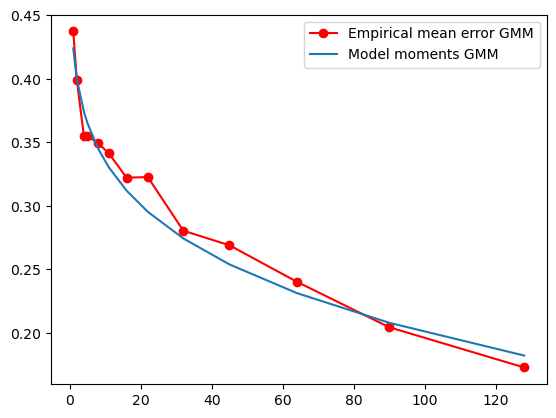

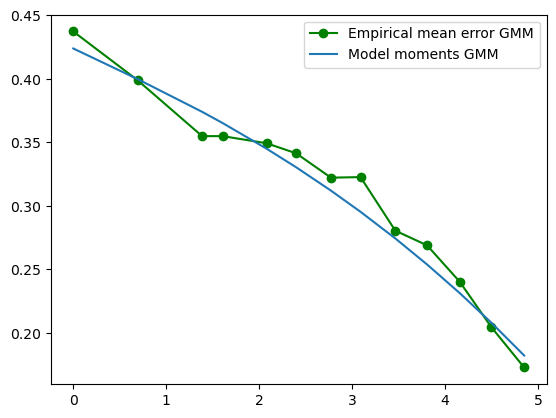

H =  0.09582658314987488 lambda2 = 0.024139309737131964 T =  3.7036956165499206 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3674590252853475 J =  10.873488972193778 J_95 =  18.30703805327515
------------------------------------------------------


(0.09582658314987488,
 0.024139309737131964,
 3.7036956165499206,
 4.5399929762484854e-05,
 0.3674590252853475,
 10.873488972193778,
 18.30703805327515,
 [array([0.43724762, 0.39882897, 0.35490305, 0.35486232, 0.34929694,
         0.34138694, 0.32220359, 0.32264307, 0.28046026, 0.26897066,
         0.24025528, 0.20446792, 0.17281963]),
  array([0.42386763, 0.39974203, 0.37402486, 0.3650893 , 0.34503216,
         0.33040414, 0.31202255, 0.29533395, 0.27435198, 0.25390837,
         0.23133768, 0.20799112, 0.18221461]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [39]:
# Synthetic index construction from those stocks
weights = [0.25,0.25,0.5]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(Stocks_test_synthindex_symbols,weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

#### Conclusion : No surprise again !
#### - Single assets have very low estimated hurst index than the synthetic index constructed above

# Mutlidimensional S-fbm model generation

- ### Sanity check: 1 dimensional S fbm

In [40]:
size = 4000
H=0.09
S_fbm_model = Sfbm(H,0.068970 ,2**14) #T=0.732075
Sfbmcorrelation = S_fbm_model.SfbmCorrelation(size)
S_fbm_model_generation_example = S_fbm_model.GenerateSfbm(size)
S_fbm_model_logvolgeneration_example = S_fbm_model.GeneratelogVol(size)
S_fbm_model_logvolgeneration_example_qv = S_fbm_model_logvolgeneration_example[0]
print(S_fbm_model_logvolgeneration_example_qv)

[0.54820413 0.88899851 0.82739873 ... 0.15251036 0.64448572 0.07736817]


*******************************
res =        fun: 0.012990994132209353
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.18952927e-02, -1.65006898e-06,  6.49885524e-02])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1032
      nit: 85
     njev: 258
   status: 2
  success: False
        x: array([-2.72269882, -2.32873729,  0.51276449])
*******************************
Objective function value after calibration =  0.007461822582745558


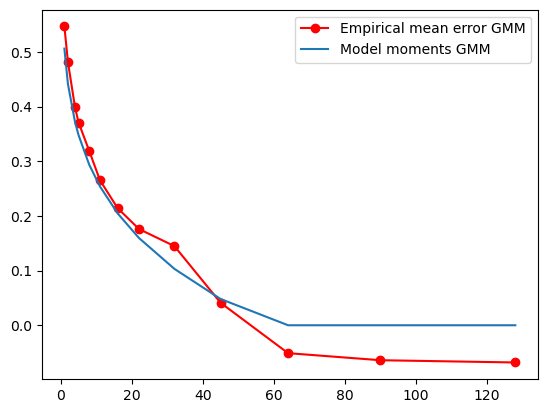

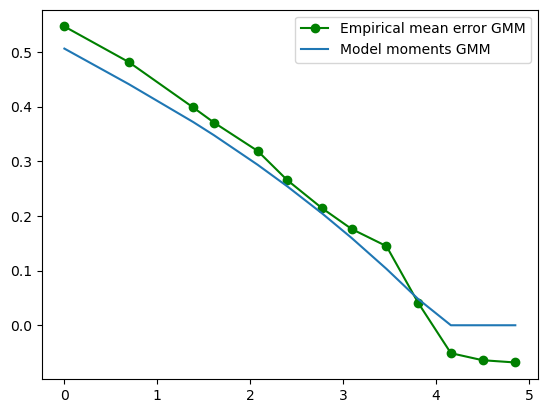

H =  0.0957472143631161 lambda2 = 0.06510963112911652 T =  2.1870918783557913 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0009098641390290125 J =  29.83982850839949 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_param1d =  (0.0957472143631161, 0.06510963112911652, 2.1870918783557913, 4.5399929762484854e-05, 0.0009098641390290125, 29.83982850839949, 18.30703805327515, [array([ 0.54666958,  0.48153327,  0.39842951,  0.37088486,  0.31895584,
        0.26555785,  0.21416824,  0.1761195 ,  0.14471126,  0.04109845,
       -0.05106   , -0.06396659, -0.06810236]), array([0.50620305, 0.44114499, 0.3718043 , 0.3477133 , 0.29364074,
       0.25420714, 0.20465756, 0.15967411, 0.10312116, 0.04802238,
       0.        , 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [41]:
GMM_1d = GMM()
index_estimatedGMM_param1d = GMM_1d.ComputeParamsGMM(S_fbm_model_logvolgeneration_example_qv,5,LagSignal=np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128]),
                         GMM_Method=1)
print("index_estimatedGMM_param1d = ", index_estimatedGMM_param1d)

- ### d dimensional S fbm

- d=1 

Recheck

*******************************
res =        fun: 0.1063543170763333
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.84183789e-04, 7.32608423e-06, 2.89351878e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 700
      nit: 87
     njev: 175
   status: 2
  success: False
        x: array([-1.95958443, -1.12781976,  1.50686206])
*******************************
Objective function value after calibration =  0.0030108643548747305


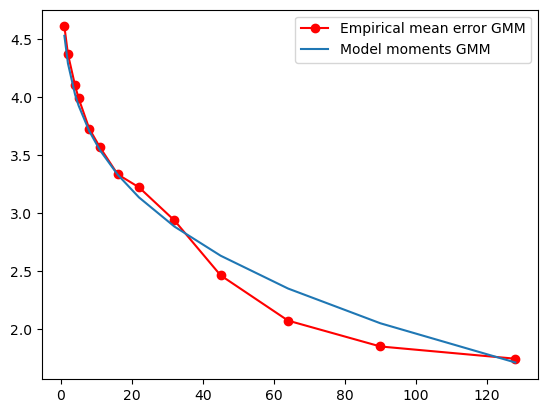

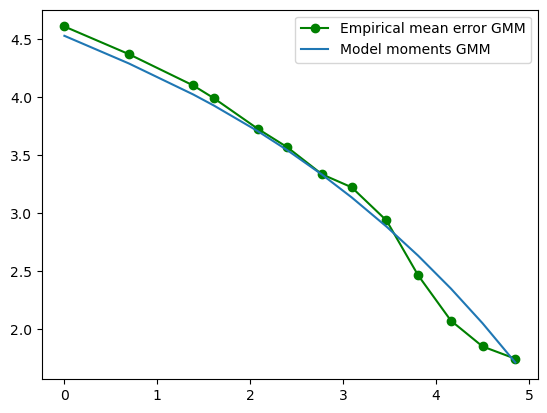

H =  0.12740735912369494 lambda2 = 0.2172551926356165 T =  4.938658039440489 lsigma2 = 4.5399929762484854e-05 p-Value=  0.28235868543698384 J =  12.040446555144047 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.12740735912369494, 0.2172551926356165, 4.938658039440489, 4.5399929762484854e-05, 0.28235868543698384, 12.040446555144047, 18.30703805327515, [array([4.6098122 , 4.37136095, 4.10080466, 3.99055916, 3.72797032,
       3.56825002, 3.33427712, 3.22253389, 2.93624273, 2.46290443,
       2.07223115, 1.84922288, 1.74362068]), array([4.52930528, 4.29100563, 4.02326976, 3.92743715, 3.70744867,
       3.54295231, 3.33164508, 3.1355552 , 2.88354581, 2.63239469,
       2.34897172, 2.04931976, 1.71115412]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [42]:
dimension = 1
Hs = [0.15 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)]
Sfbms = [Sfbm(Hs[i], 0.02,2**14) for i in range(dimension)]  # 0.068970
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

Checking robustness

*******************************
res =        fun: 0.22489747612253408
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.10782522e-07, 1.83186800e-07, 1.09912080e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 552
      nit: 39
     njev: 138
   status: 2
  success: False
        x: array([-1.52556519, -1.37243212,  1.39786286])
*******************************
Objective function value after calibration =  0.006787558837364659
H =  0.13934143446621042 lambda2 = 0.24798767196944688 T =  3.07403029801785 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0024716343632523764 J =  27.143447790621273 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.049456015458431465
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.83516268e-05, 1.04985464e-06, 4.73371340e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 360
      nit: 32
     njev: 90
   s

Objective function value after calibration =  0.005146047526253667
H =  0.15876522660724815 lambda2 = 0.20232840583920111 T =  3.899873625648358 lsigma2 = 4.5399929762484854e-05 p-Value=  0.024227859675078536 J =  20.579044057488417 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.16048820465794564
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.15025785e-06, -1.25455201e-06,  1.74582570e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1036
      nit: 139
     njev: 259
   status: 2
  success: False
        x: array([-2.13298319, -0.96882172,  0.85577282])
*******************************
Objective function value after calibration =  0.006095330911983617
H =  0.1011594084456794 lambda2 = 0.262187951057211 T =  2.3060444933791397 lsigma2 = 4.5399929762484854e-05 p-Value=  0.006664337221418003 J =  24.375228317017196 J_95 =  18.30703805327515
-----------------------

*******************************
res =        fun: 0.2965561794536066
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.01284409, -0.00197691,  1.84151298])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 828
      nit: 25
     njev: 207
   status: 2
  success: False
        x: array([-1.99134332, -0.71791149,  0.99908326])
*******************************
Objective function value after calibration =  0.005153379031417072
H =  0.15916291351469602 lambda2 = 0.22208198168284798 T =  3.7579570879883737 lsigma2 = 4.5399929762484854e-05 p-Value=  0.02399619672859323 J =  20.608362746619427 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.024194740660899258
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.43034890e-05, -3.60822485e-08, -5.86336538e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 396
      nit: 37
     njev: 99
   status: 

Objective function value after calibration =  0.0062447656356504795
H =  0.06967067731204944 lambda2 = 0.30237749445114626 T =  1.9019323259826164 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0053972674611040185 J =  24.972817776966266 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0433567998950362
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.83106873e-07,  1.08107968e-06,  1.22818423e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 376
      nit: 54
     njev: 94
   status: 0
  success: True
        x: array([-1.69911451, -1.35442163,  1.30814465])
*******************************
Objective function value after calibration =  0.0016939601407840472
H =  0.16063232999726176 lambda2 = 0.20228075073126064 T =  3.827030775296404 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7465809849007546 J =  6.774146602984655 J_95 =  18.30703805327515
--------

*******************************
res =        fun: 0.2326001192133243
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.41788839e-06, 3.33066909e-08, 9.99200728e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 868
      nit: 104
     njev: 217
   status: 2
  success: False
        x: array([-1.33351474, -1.63235924,  1.61916591])
*******************************
Objective function value after calibration =  0.0056308929036171605
H =  0.15150327393050153 lambda2 = 0.22696320810965898 T =  3.392149924308662 lsigma2 = 4.5399929762484854e-05 p-Value=  0.012672823479688431 J =  22.517940721565026 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.058572004902391145
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.52499542e-04, -4.87873628e-05,  2.80470090e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 356
      nit: 27
     njev: 89


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.004380750748769414
H =  0.12501934131194806 lambda2 = 0.24821049736414183 T =  3.1786405988577697 lsigma2 = 4.5399929762484854e-05 p-Value=  0.06364738811554958 J =  17.518622244328885 J_95 =  18.30703805327515
------------------------------------------------------


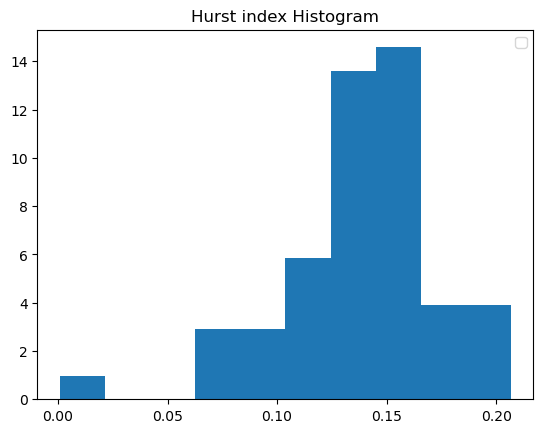

In [43]:
Number_indices = 50
dimension = 1
H = 0.15
Hs = [H for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'direct',keys)
Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram')

#### Conclusion : H estimation is robust in some sense for 1D Sfbm models 
#### Need more GMM iteration (random weight matrix updates) to capture multifractal models H->0 ~ 50 iterations

- d>1

*******************************
res =        fun: 5.1174317646571215
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.07409966, -0.00180584, -0.02615792])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 608
      nit: 48
     njev: 152
   status: 0
  success: True
        x: array([-7.39084588e+00,  9.43580720e+00,  6.22367537e-03])
*******************************
Objective function value after calibration =  0.0102211585423032


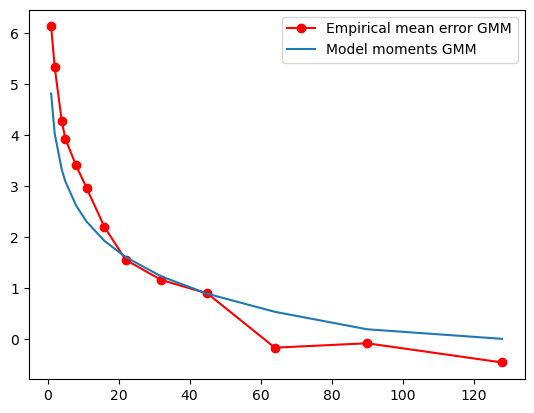

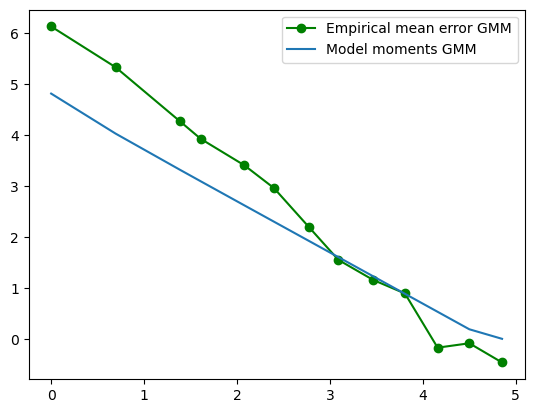

H =  0.0006166199708747013 lambda2 = 0.9999201923421218 T =  1.0057958975627403 lsigma2 = 4.5399929762484854e-05 p-Value=  1.1876685826302107e-05 J =  40.874413010670494 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.0006166199708747013, 0.9999201923421218, 1.0057958975627403, 4.5399929762484854e-05, 1.1876685826302107e-05, 40.874413010670494, 18.30703805327515, [array([ 6.13731646,  5.33735897,  4.27348749,  3.92975181,  3.40900374,
        2.96152075,  2.1982382 ,  1.55067751,  1.15647241,  0.89155476,
       -0.17370501, -0.08725473, -0.46474028]), array([4.81881039, 4.03291185, 3.32136086, 3.09562985, 2.62195454,
       2.30163403, 1.924945  , 1.6048147 , 1.22807765, 0.88518293,
       0.5307984 , 0.18764076, 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [45]:
dimension = 2
Hs = [0.12 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)] 
Sfbms = [Sfbm(Hs[i], 0.068970 ,2**14) for i in range(dimension)]
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

####  The GMM calibration is aborted du to a small gradient norm (stopping condition). 
#### Let's plot the Hat{H} distribution over multiple index trajectories :  Rough independant processes 

*******************************
res =        fun: 121.246741252238
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.84319049, -6.18813407, 10.        ])
*******************************
Objective function value after calibration =  0.022660873057884
H =  0.8633256038519005 lambda2 = 0.0020494463078183805 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.354405845501772e-52 J =  271.86249407543437 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 95.21518214335211
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.

Objective function value after calibration =  0.027803972456716453
H =  0.8765508220520671 lambda2 = 0.0015013933730157459 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.2198506012758425e-65 J =  333.5642575632273 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 169.9097779865174
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 2.19560462, -7.07565799, 10.        ])
*******************************
Objective function value after calibration =  0.12741987185440773
H =  0.899854109366749 lambda2 = 0.0008447219262144577 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0 J =  1528.6562026373294 J_95 =  18.30703805327515
------------------------------------------------------
********

Objective function value after calibration =  0.042601475015879214
H =  0.7094518642053217 lambda2 = 0.0005282120183082783 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.88244231949223e-103 J =  511.08989576550294 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 100.96379689832531
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 3.83954011, -7.16817975, 10.        ])
*******************************
Objective function value after calibration =  0.017909257017629368
H =  0.9789491778304437 lambda2 = 0.0007701308084536832 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.273232157510653e-40 J =  214.85735644049953 J_95 =  18.30703805327515
------------------------------------------

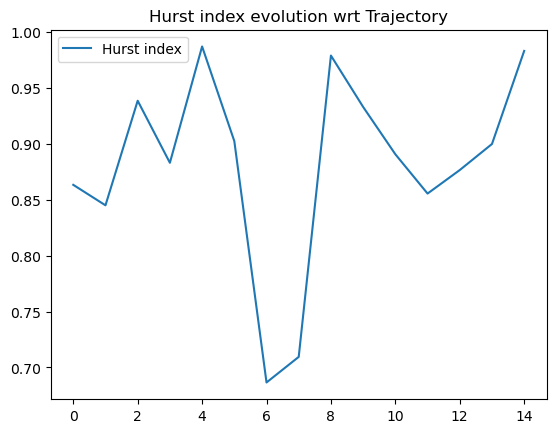

In [9]:
Number_indices = 15
dimension = 2
Hs = [0.15 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    #Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])
    Multiple_Sfbms.append([Sfbm(Hs[i],0.068970 ,2**14) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'curve')

#### Increase the dimension d=15

*******************************
res =        fun: 9.08707658609849
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.7406225 , -8.00286687, 10.        ])
*******************************
Objective function value after calibration =  0.06837213035124812
H =  0.8507661169191457 lambda2 = 0.0003343904226215661 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  9.087171755727862e-170 J =  820.2604478239236 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 10.241677326733537
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([

Objective function value after calibration =  0.059336654713046943
H =  0.8361069434698811 lambda2 = 0.00013654746467284886 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.7836517458482808e-146 J =  711.8618465924242 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 9.99663008597788
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.80759429, -9.23398922, 10.        ])
*******************************
Objective function value after calibration =  0.0644351115766707
H =  0.8590708713250117 lambda2 = 9.765332266210965e-05 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.2943483160426107e-159 J =  773.0280335853184 J_95 =  18.30703805327515
-------------------------------------------

Objective function value after calibration =  0.059374654720415365
H =  0.8034113049552841 lambda2 = 0.0007180447209334687 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.4237202832362051e-146 J =  712.3177326808232 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 9.084834417072287
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.72621005, -8.61235831, 10.        ])
*******************************
Objective function value after calibration =  0.055187301387616294
H =  0.8489270020938445 lambda2 = 0.00018181149650707367 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  8.615649276820295e-136 J =  662.0820547472326 J_95 =  18.30703805327515
-----------------------------------------

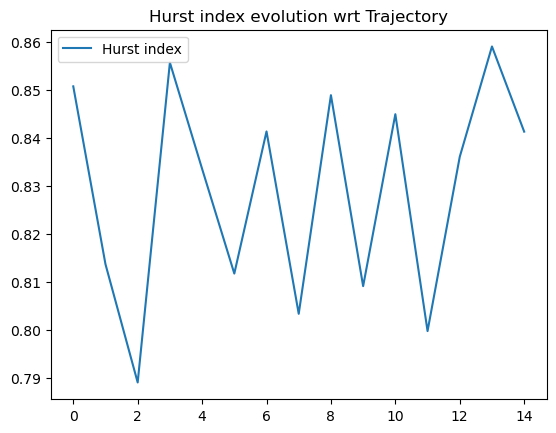

In [9]:
Number_indices = 15
dimension = 10
Hs = [0.25 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'curve')

#### Let's plot the Hat{H} distribution over multiple index trajectories :  Multifractal independant processes 

*******************************
res =        fun: 22.82082177198923
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.42785744, -6.70803019, 10.        ])
*******************************
Objective function value after calibration =  0.06928152195148882
H =  0.605361928944638 lambda2 = 0.0012195778469947128 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  4.0950196795622105e-172 J =  831.1704188520114 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 654.4389894927856
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([

Objective function value after calibration =  0.014152990768571933
H =  0.6871192958496527 lambda2 = 0.0016658138316828055 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  3.0611079519968515e-31 J =  169.79343025055746 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1087.7096783112952
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.33695958, -4.96360424, 10.        ])
*******************************
Objective function value after calibration =  0.06347965943532441
H =  0.7919895012102337 lambda2 = 0.006939207990451906 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  3.7603676716550786e-157 J =  761.565474245587 J_95 =  18.30703805327515
-------------------------------------------

Objective function value after calibration =  0.0333225994487385
H =  0.8789439352356307 lambda2 = 0.0032452953495254325 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.0530050262154806e-79 J =  399.77122558651575 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 7895.814808715075
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 2.80569586, -4.06223714, 10.        ])
*******************************
Objective function value after calibration =  0.10311557883241851
H =  0.942982842741296 lambda2 = 0.016919284881692608 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.445712982039306e-259 J =  1237.0775992525248 J_95 =  18.30703805327515
----------------------------------------------

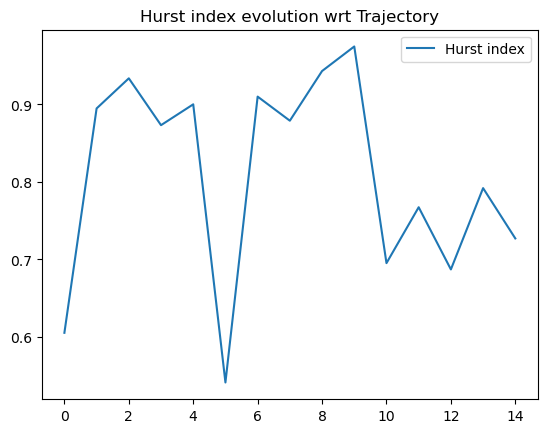

In [8]:
Number_indices = 10
dimension = 2
Hs = [0.001 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'curve')